In [43]:
import pandas as pd
import sqlite3

In [44]:
con = sqlite3.connect(f"file:../data/db/soccer.db?mode=rw", uri=True) 
# 获取cursor对象 
cur = con.cursor() 

In [45]:
results = pd.read_sql("""
            SELECT *
            FROM Accuracy
            where team = 'Man United' and model = 'KQON'
            """, con)

In [46]:
train_results = results[results['type'] == 'test']

train_results

,id,model,team,type,epoch,loss,acc
20,3d6c6fcf-a717-4db2-be6a-64bad5468296,KQON,Man United,test,0.0,1.690872,0.500
21,694b26aa-00a4-47bf-a461-6b90ef8e9cd9,KQON,Man United,test,1.0,1.296206,0.350
22,5fd74fb3-8d70-45f7-b51a-d7af105ec64e,KQON,Man United,test,2.0,1.132731,0.475
23,21d2ae7e-9d31-42c9-8c14-01c9e0d43a24,KQON,Man United,test,3.0,1.051986,0.450
24,9c9a6372-001e-4261-b847-d967f3d395e0,KQON,Man United,test,4.0,0.986394,0.475
25,22e3a05f-6e47-46e9-8ab0-fb278a402153,KQON,Man United,test,5.0,0.944828,0.425
26,6111c5be-05bb-4c21-b6f3-e4a7d76daf1a,KQON,Man United,test,6.0,0.901504,0.475
27,bad76a7b-02d6-469d-b249-b0b0ebc8adc0,KQON,Man United,test,7.0,0.875728,0.425
28,d973c975-f5dc-42e2-97b3-d0d71fd9ee53,KQON,Man United,test,8.0,0.844762,0.500
29,dfc5ddf3-a2f1-41ce-9eb7-b30dca864995,KQON,Man United,test,9.0,0.828805,0.425


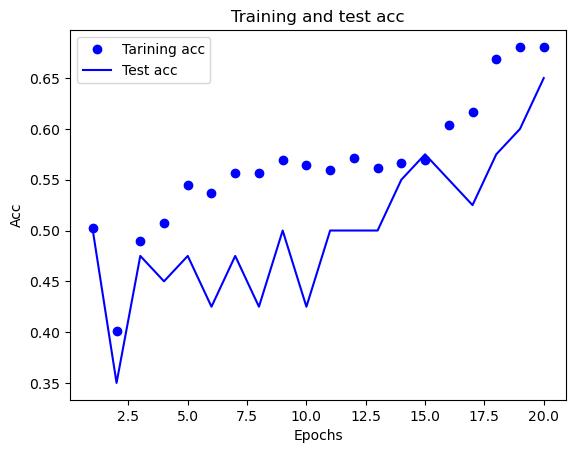

In [47]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_results) + 1)

plt.plot(epochs, results[results['type'] == 'train']['acc'], 'bo', label="Tarining acc")
plt.plot(epochs, results[results['type'] == 'test']['acc'], 'b', label="Test acc")
plt.title('Training and test acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

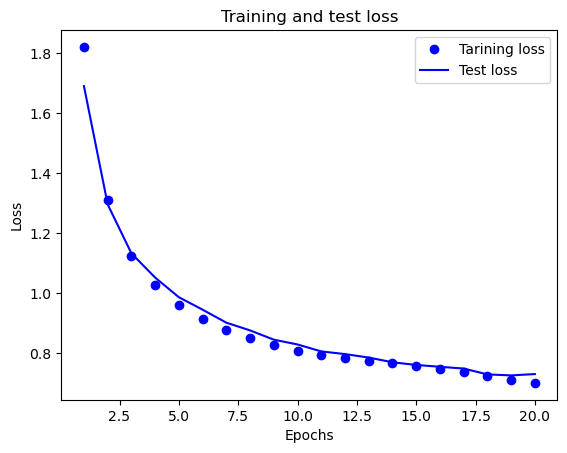

In [48]:

epochs = range(1, len(train_results) + 1)

plt.plot(epochs, results[results['type'] == 'train']['loss'], 'bo', label="Tarining loss")
plt.plot(epochs, results[results['type'] == 'test']['loss'], 'b', label="Test loss")
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()